# K-Means Clustering Algorithm

K-means is a clustering algorithm that partitions data into k clusters by iteratively assigning points to the nearest cluster center and updating those centers.

## Algorithm Steps

### Step 1: Initialize
Choose k (number of clusters) and place k centroids randomly in the data space.

```
Data points:           Initial centroids:
  •     •                 ★ (C1)
    •       •
•           •           ★ (C2)
      •   •
    •                   ★ (C3)
```

### Step 2: Assignment
Assign each data point to the nearest centroid based on Euclidean distance.

```
Cluster assignments:
  •(1)     •(2)           ★ C1
    •(1)       •(2)
•(1)           •(2)       ★ C2
      •(3)   •(2)
    •(3)                 ★ C3

Legend: •(1) = assigned to C1, •(2) = assigned to C2, •(3) = assigned to C3
```

### Step 3: Update Centroids
Move each centroid to the mean position of all points assigned to it.

```
New centroid positions:
  •     •                 
    •       •             ★ C1 (moved)
•           •           
      •   •               ★ C2 (moved)
    •                     
                          ★ C3 (moved)
```

### Step 4: Repeat
Continue steps 2-3 until centroids stop moving significantly.

```
Final clustering:
Cluster 1: •••           ★ C1
           •

Cluster 2:     •••       ★ C2
               ••

Cluster 3:       •       ★ C3
                 •
```

## Mathematical Formulation

The algorithm minimizes the within-cluster sum of squares (WCSS):

```
J = Σ(i=1 to k) Σ(x∈Ci) ||x - μi||²

Where:
- k = number of clusters
- Ci = set of points in cluster i
- μi = centroid of cluster i
- x = data point
```

## Convergence Example

```
Iteration 1:    Iteration 2:    Iteration 3:    Final:
   •  •           •  •           •  •           •  •
 ★    •         ★    •           ★  •             ★•
   •              •              •              •
     ★              ★              ★              ★
 •    •         •    •         •    •         •    •
   ★              ★              ★              ★
```

The algorithm converges when centroids no longer move between iterations or move less than a specified threshold.

## Key Characteristics

- **Time Complexity**: O(n × k × i × d) where n=data points, k=clusters, i=iterations, d=dimensions
- **Space Complexity**: O(n × d)
- **Assumes**: Spherical clusters, similar cluster sizes, similar densities
- **Sensitive to**: Initial centroid placement, outliers, non-spherical cluster shapes

## Advantages

- Simple and easy to implement
- Computationally efficient for large datasets
- Works well with spherical clusters
- Guaranteed to converge

## Disadvantages

- Requires pre-specifying k (number of clusters)
- Sensitive to initial centroid placement
- May converge to local optima
- Struggles with non-spherical clusters
- Sensitive to outliers

## Practical Tips

- Use multiple random initializations and choose the best result
- Consider using k-means++ initialization for better starting centroids
- Apply methods like the elbow method or silhouette analysis to determine optimal k
- Standardize features if they have different scales

The algorithm is guaranteed to converge but may reach a local optimum rather than the global optimum, which is why multiple runs with different initializations are often used.

In [1]:
# The code is importing several Python libraries: pandas, numpy, matplotlib, and seaborn.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The code `df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")` is reading a CSV file from the given URL and storing it in a variable called `df`. The `pd.read_csv()` function is a method from the pandas library that is used to read CSV files and create a DataFrame object in Python.

df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")

In [3]:
# The `df` command is used to display information about the file system usage on a Linux or Unix system. It shows the amount of disk space used, available, and the percentage of usage for each mounted file system.

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# The code `x = df.iloc[:, [3,4]]` is selecting specific columns from a DataFrame `df` and assigning them to a new variable `x`.

x = df.iloc[:, [3,4]]

In [5]:
# `x` is a variable that has been declared, but its purpose or value is not specified in the given code snippet.

x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
# `from sklearn.cluster import KMeans` is importing the `KMeans` class from the `cluster` module of the `sklearn` library. This allows you to use the K-means clustering algorithm for clustering data.

from sklearn.cluster import KMeans

In [7]:
# The code is performing a loop from 1 to 10 (inclusive) and for each iteration, it is creating a KMeans object with a specific number of clusters (i), initializing it using the 'k-means++' method, and fitting it to the data (x). After fitting, it calculates the within-cluster sum of squares (WCSS) using the inertia_ attribute of the KMeans object and appends it to the wcss list. This process is repeated for each value of i, resulting in a list of WCSS values for different numbers of clusters.

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

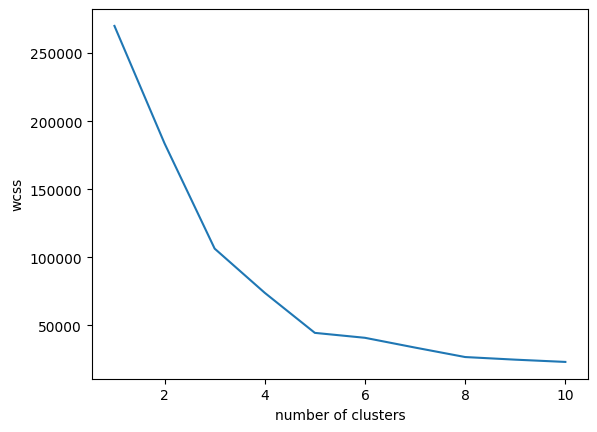

In [8]:
# The code is plotting a line graph using the `plt.plot()` function from the matplotlib library.

plt.plot(range(1,11), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
# The code is performing k-means clustering on the data `x`.

kmeans = KMeans(n_clusters = 5, init= "k-means++", random_state= 42)
y_kmeans = kmeans.fit_predict(x)

In [10]:
# `y_kmeans` is likely a variable that stores the labels or cluster assignments generated by the k-means clustering algorithm.

y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

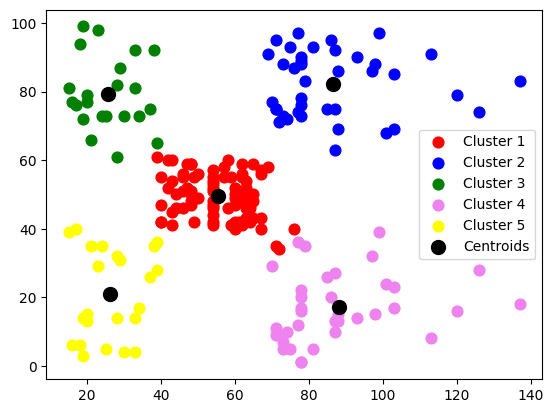

In [11]:
# The code is creating a scatter plot to visualize the clusters obtained from the k-means clustering algorithm.

x_array = x.to_numpy()  

plt.scatter(x_array[y_kmeans==0, 0], x_array[y_kmeans==0, 1], s=60, c='red', label='Cluster 1')
plt.scatter(x_array[y_kmeans==1, 0], x_array[y_kmeans==1, 1], s=60, c='blue', label='Cluster 2')
plt.scatter(x_array[y_kmeans==2, 0], x_array[y_kmeans==2, 1], s=60, c='green', label='Cluster 3')
plt.scatter(x_array[y_kmeans==3, 0], x_array[y_kmeans==3, 1], s=60, c='violet', label='Cluster 4')
plt.scatter(x_array[y_kmeans==4, 0], x_array[y_kmeans==4, 1], s=60, c='yellow', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.legend()
plt.show()